# STAT207 Final Project 

Sarah Michalec, Jada Giddens, Armeen Sultan, Trish Qiu

In [1]:
# List of Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

## 1. <u>Introduction</u>

#### **Research Introduction and Motivation**
Someone may want to build a predictive model that predicts someone's gender based on their physical characteristics for purposes such as identity verification, particularly for individuals working on creating an accurate facial recognition model. According to the website "BuiltIn," facial recognition is a technology that identifies a human's face by using software that maps out and analyzes key facial features. This software typically compares a person's facial features to a database of other faces. In another article published by Harvard University, it states that out of all the different technological methods of individual identification, facial recognition is the least accurate. Thus, this prompts professionals in the facial recognition industry to analyze facial data to clearly identify factors such as gender. This individual would likely prefer equally high accuracy for both "positives" and "negatives" because they would want to know both when physical characteristics correctly identify a person's gender and when physical characteristics do not align with correctly identifying someone's gender. By considering both the positives and negatives, they will be able to create the most unbiased facial recognition system.

#### **Research Goal Statement**

Our primary research goal is to build a predictive model that will effectively predict gender with two levels, male and female, for new datasets. Ideally, we would also like to achieve our secondary goals. We will do this by considering the seven explanatory variables, long hair, forhead width, forhead height, nose width, nose length, thin lips, and the distance from nose to lips. Our first secondary research goal is to yield reliable interpretative insights about the nature of the relationship between the variables in our dataset. Our second secondary research goal is to thoroughly describe the nature and the relationship of the variables we use in our model.

## 2. <u>Dataset Discussion</u>

#### **Dataset Display**

In [2]:
# Reading csv file into a dataframe
gender_data = pd.read_csv("gender_classification_v7.csv")

# Displaying first 5 rows
gender_data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
# Number of rows: Before any data cleaning, our dataframe has 5001 rows.
gender_data.shape[0]

5001

#### **Dataset Source**

We retrieved and dowloaded the csv file from Kaggle on April 17th, 2024. It was created by author Jifry Issadeen and it can be found at https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset?resource=download.

#### **Original Dataset Information**
Each row in the dataset represents an individual that identifies as either male or female. In each row other information is contained about that individual such as their forehead width, whether they have long hair or short hair, a wide nose or narrow nose, thin lips or full lips, and more.

Furthermore, this dataset is not inclusive of all observations that could have been considerd in this dataset as it only contains 5001 entries whereas the human population is greater than 8 billion. It is hard to say exactly what individuals were left out of this dataset, as it is unknown how this dataset was collected and if data was collected based on any specific age groups or other characteristics. Therefore, any types of individuals could have been left out with all differing characteristics. It would be very hard to try and capture every individual in the population.

Due to it being impossible to capture every possibility, this impacts the types of actions that the person in our research motivation might take because they may be less trusting of the results since our model will not be applicable to every single person. Everyone is unique and our model should only be used by the person in our research motivation as a prediction, but not as a definative answer. Thus, this may affect the facial recognition researcher's actions because they may take more actions to determine whether someone is male or female.

#### **Selected Variables**

The variable we used as our response variable is gender which in our case is either male or female. As for explanatory variables we chose 7 total, 5 are categorical, and two are numerical. The numerical explanatory variables are forehead_width_cm and forehead_height_cm. The explanatory explanatory variables are nose_wide, nose_long, lips_thin, and distance_nose_to_lip_long. Based on the information we were given about the dataest, we are unsure what measurements coincide with long or not according to the author. We chose to work with all of the previously mentioned variables because they all seem like characteristics that could help distinguish male and female individuals. For example, some common beliefs include that men have larger noses, thinner lips, and bigger foreheads. Whereas women are more likely to have fuller lips, smaller noses, and smaller foreheads. Since our model will determine if this is true on its own by fitting trends using characteristics likes the ones we chose will give it the best chance at finding trends to fit.


## 3. <u>Dataset Cleaning<u/>

#### **Missing Value Detection and Cleaning**

In [4]:
# checking for implicit missing values
gender_data.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [5]:
# checking for explicit missing values
gender_data.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

**Evaluating Pros and Cons**

* A pro of the method we used for discovering any implicit and explicit missing values is that we are able to explicitly see each of the columns data type. This helps us be sure that each value is what it should be. 
* A con would be that it doesnt explicitly tell us if there are any implict missing variables. If there were an out of place data type like object for the column long hair, I would have to use another function to discover what specifc object value was not account for as NAN.

#### **Outlier Cleaning**

<Axes: xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

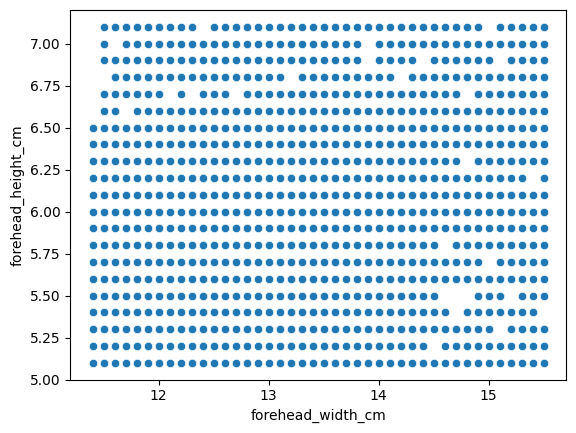

In [6]:
# Checking for outliers, only one pair of numerical variable so only one scatter plot
sns.scatterplot(x='forehead_width_cm', y= 'forehead_height_cm', data=gender_data)

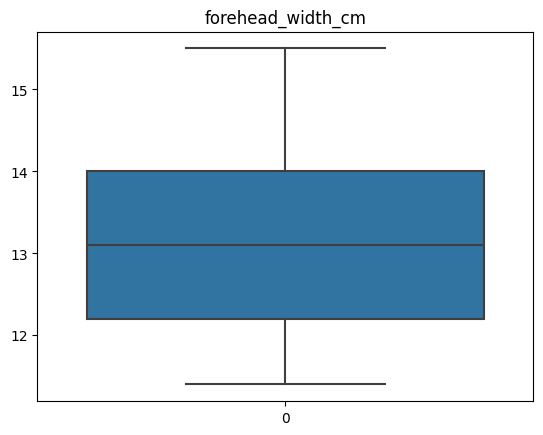

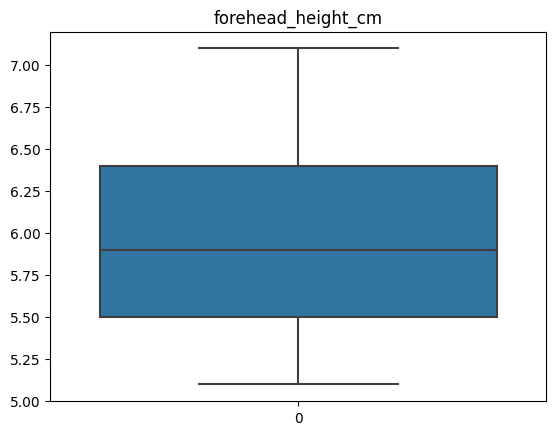

In [7]:
# Checking boxplot distribution of numerical values
num_col = ['forehead_width_cm', 'forehead_height_cm']
for col in num_col:
  sns.boxplot(gender_data[col])
  plt.title(col)
  plt.show()

No outliers were detected in our numerical explanatory variables.

#### **Sample Size Cleaning**

In [8]:
# Checking sample size
cat_var = ['gender', 'long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
for col in cat_var:
  display(gender_data[col].value_counts())

gender
Female    2501
Male      2500
Name: count, dtype: int64

long_hair
1    4349
0     652
Name: count, dtype: int64

nose_wide
0    2531
1    2470
Name: count, dtype: int64

nose_long
1    2540
0    2461
Name: count, dtype: int64

lips_thin
0    2535
1    2466
Name: count, dtype: int64

distance_nose_to_lip_long
0    2506
1    2495
Name: count, dtype: int64

No categorical variable counts were detected to be low in our categorical explanatory variables.

#### **Summary**

There were no rows dropped in this section based on explicit and implicit missing value, outlier, and sample size cleaning. 

No additional data cleaning was performed after attempting to answer our research question below.

This is a pro because it means the model that we'll build will be representive of the entire dataset, unless it's discovered later on that some variables are over or underfitting.

## 4. <u>Preliminary Analysis</u>

#### **Relationships between the Response Variable and the Numerical Explanatory Variables**

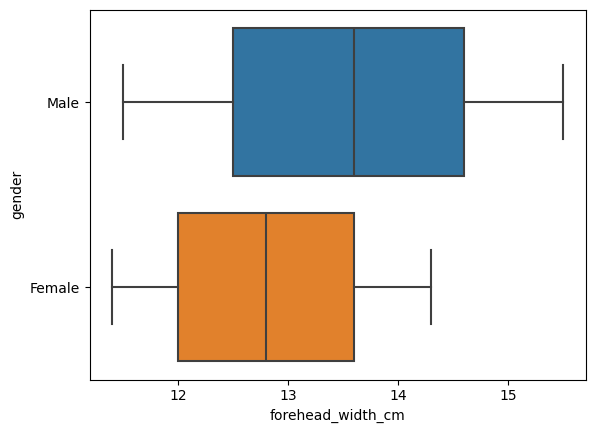

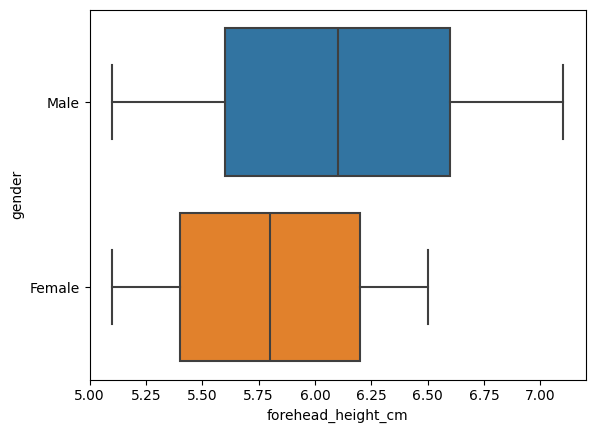

In [9]:
# Visualizing the realtionship between the numerical explanatory variables and response variable
for col in num_col:
  sns.boxplot(x=col, y='gender', data=gender_data)
  plt.show()

Each of the numerical explanatory variables have a moderate association with the response variable gender. The variable forehead_height_cm has the greatest association between the two.

#### **Relationships between the Response Variable and the Categorical Explanatory Variables**

In [10]:
# Changing the values to represent categorical variables
gender_data['distance_nose_to_lip_long'] = gender_data['distance_nose_to_lip_long'].replace({1:'yes', 0:'no'})
gender_data['lips_thin'] = gender_data['lips_thin'].replace({1:'yes', 0:'no'})
gender_data['nose_long']= gender_data['nose_long'].replace({1:'yes', 0:'no'})
gender_data['long_hair']= gender_data['long_hair'].replace({1:'yes', 0:'no'})
gender_data['nose_wide']= gender_data['nose_wide'].replace({1:'yes', 0:'no'})
gender_data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,yes,11.8,6.1,yes,no,yes,yes,Male
1,no,14.0,5.4,no,no,yes,no,Female
2,no,11.8,6.3,yes,yes,yes,yes,Male
3,no,14.4,6.1,no,yes,yes,yes,Male
4,yes,13.5,5.9,no,no,no,no,Female


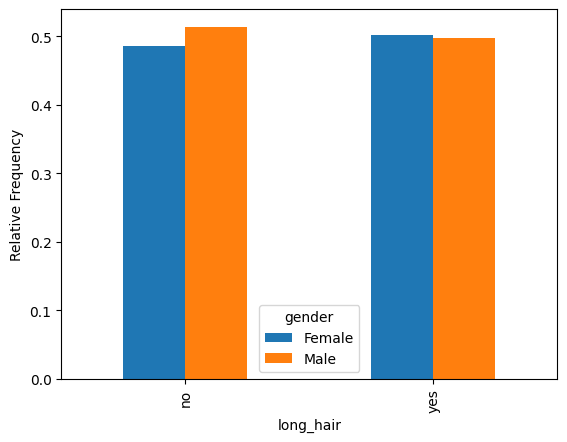

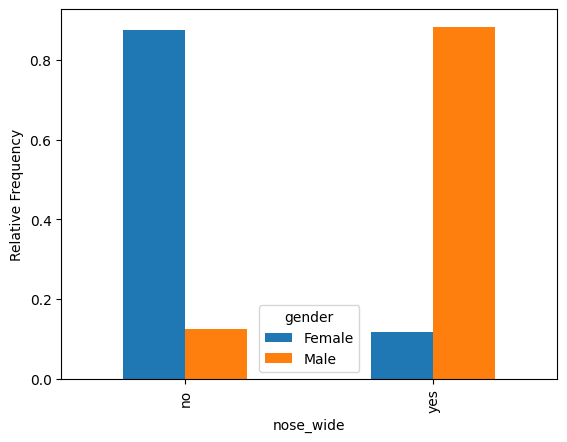

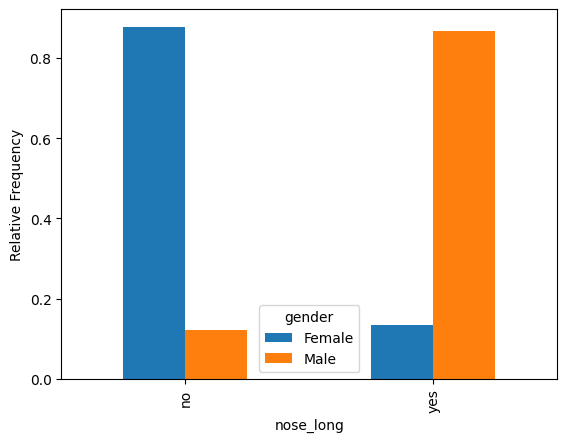

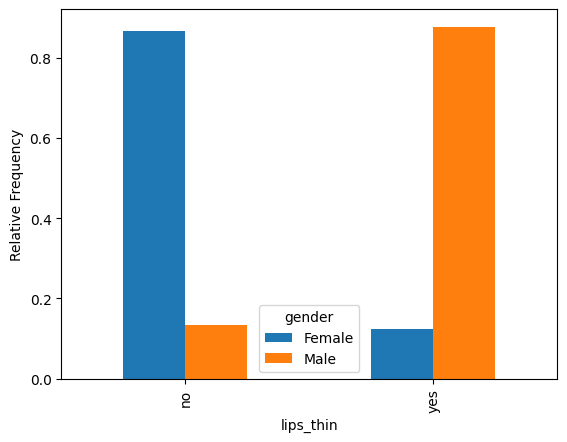

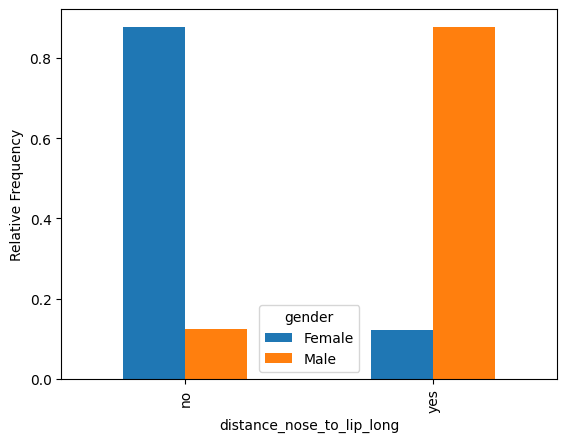

In [11]:
# Visualizing the realtionship between the categorical explanatory variables and response variable
cat_var = [ 'long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
for col in cat_var:
  temp = pd.crosstab(gender_data[col], gender_data['gender'], normalize='index')
  temp.plot.bar()
  plt.ylabel('Relative Frequency')
  plt.show()

In terms of the categorical explanatory variables all except the long hair variable have a strong equal association with the response variable gender.

#### **Interaction Terms**

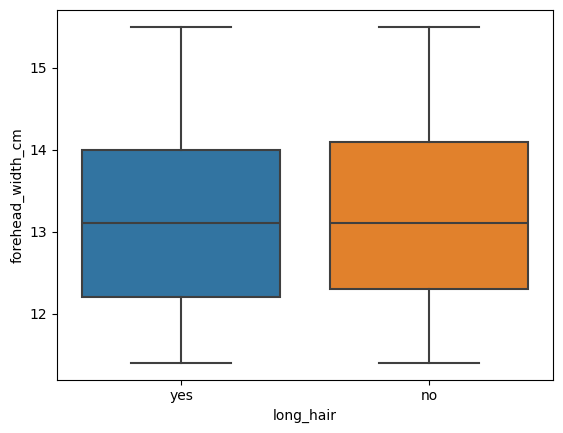

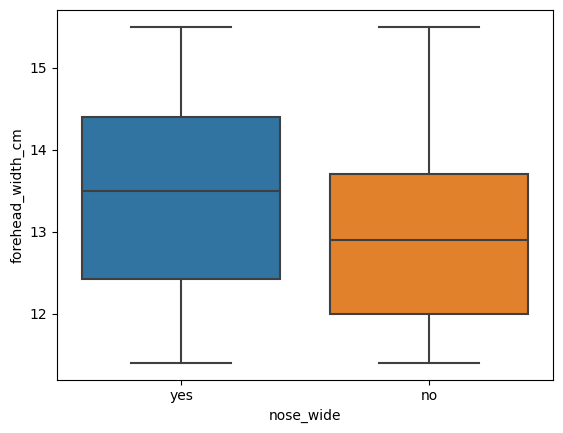

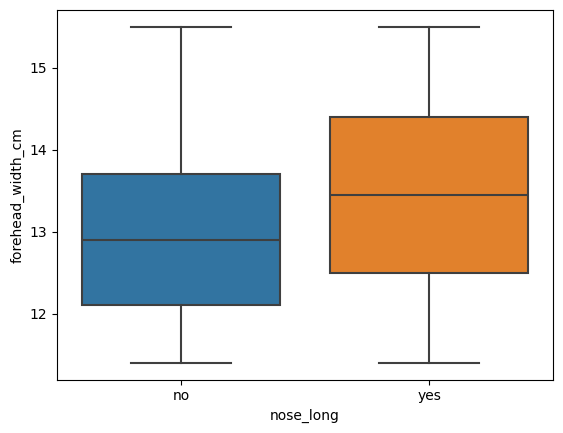

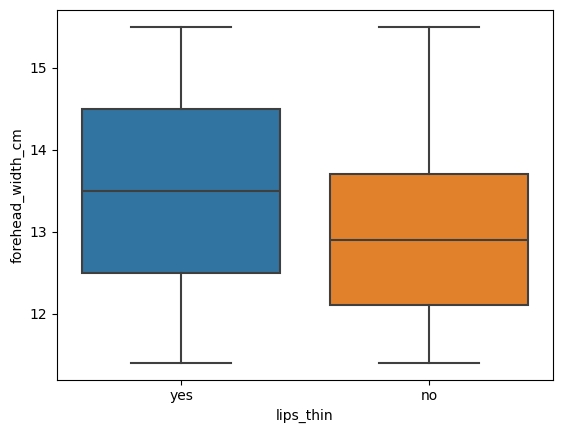

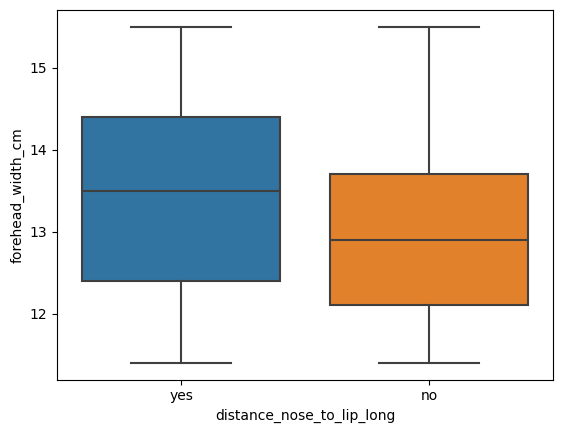

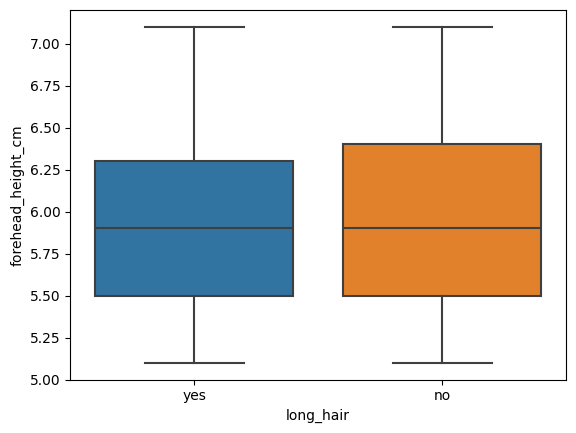

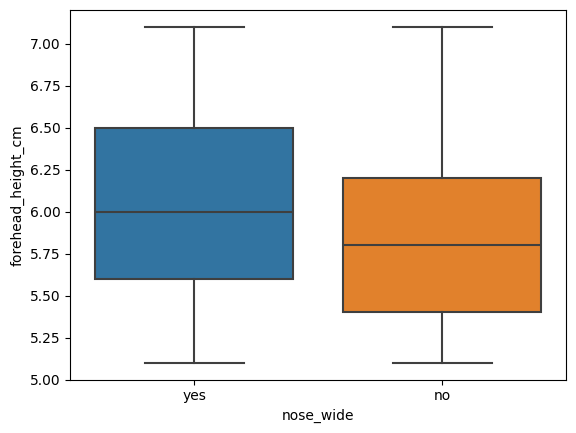

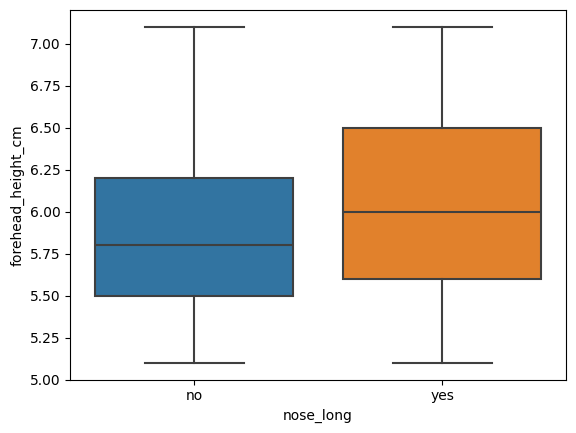

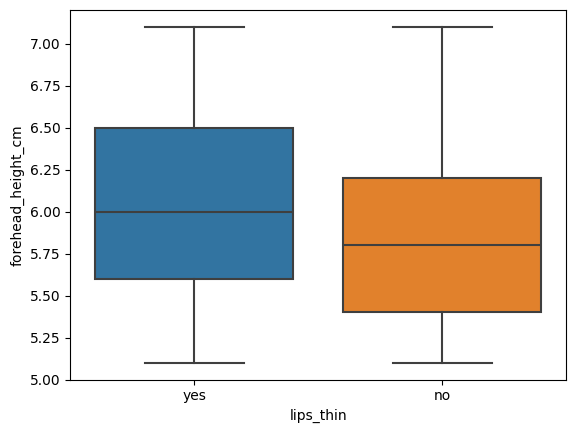

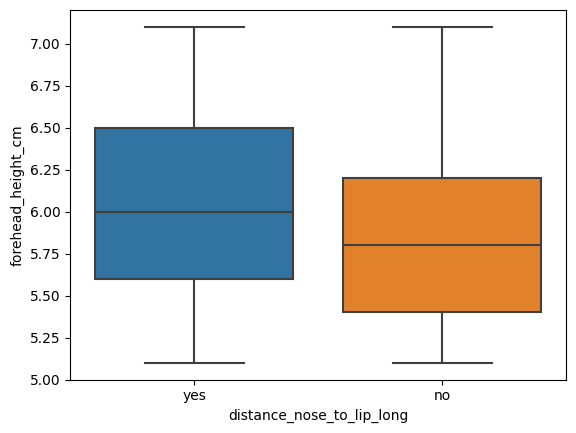

In [12]:
# Looping through categorical and numerical variable pairs
for n_col in num_col:
  for c_col in cat_var:
    sns.boxplot(x=c_col, y=n_col, data=gender_data)
    plt.show()

Due to the difference in IQR for each of the box plots, we can see that there is at least a moderate interaction between each of the pairs of numerical and explanatory variables. Amongst the relationships, long_hair and forehead_height_sm and forehead_width_cm has the weakest association.

In [13]:
# Looking for any interaction between the numerical and categorical explanatory varaibles and the response variable gender

# First create the 0/1 response variable
gender_data['gender'] = gender_data['gender'].replace({'Female':1, 'Male':0})
gender_data.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,yes,11.8,6.1,yes,no,yes,yes,0
1,no,14.0,5.4,no,no,yes,no,1
2,no,11.8,6.3,yes,yes,yes,yes,0
3,no,14.4,6.1,no,yes,yes,yes,0
4,yes,13.5,5.9,no,no,no,no,1


In [14]:
import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
warnings.filterwarnings("ignore", category=PerfectSeparationWarning)

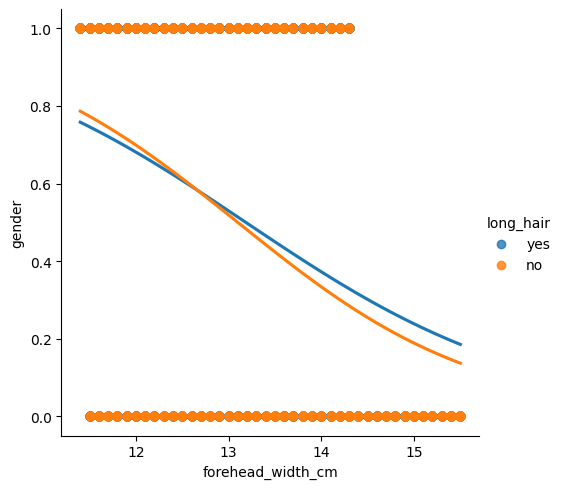

Optimization terminated successfully.
         Current function value: 0.637684
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615135
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,8.4380,0.408,20.692,0.000,7.639,9.237
forehead_width_cm,-0.6400,0.031,-20.712,0.000,-0.701,-0.579


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,10.0498,1.095,9.179,0.000,7.904,12.196
forehead_width_cm,-0.7672,0.083,-9.230,0.000,-0.930,-0.604


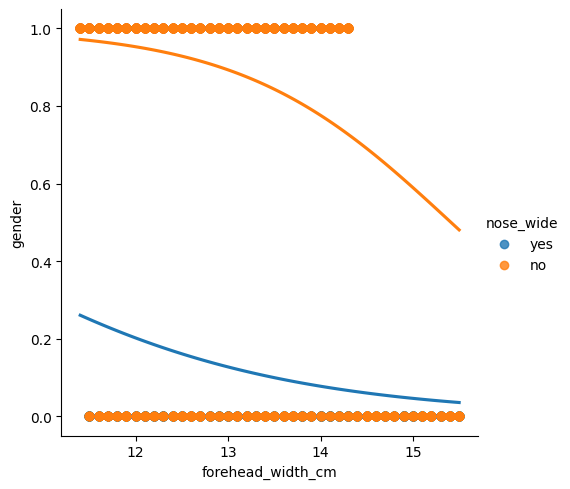

Optimization terminated successfully.
         Current function value: 0.340129
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340502
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,5.2517,0.777,6.757,0.000,3.728,6.775
forehead_width_cm,-0.5523,0.060,-9.213,0.000,-0.670,-0.435


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.5641,0.931,14.572,0.000,11.740,15.389
forehead_width_cm,-0.8802,0.069,-12.764,0.000,-1.015,-0.745


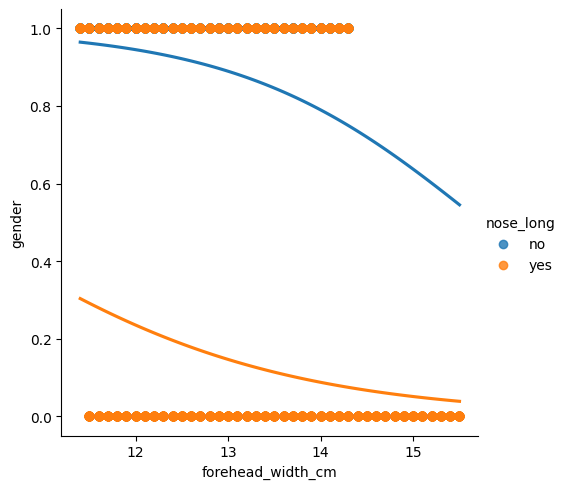

Optimization terminated successfully.
         Current function value: 0.369518
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344146
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,5.8128,0.723,8.036,0.000,4.395,7.231
forehead_width_cm,-0.5828,0.056,-10.439,0.000,-0.692,-0.473


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,11.9817,0.935,12.813,0.000,10.149,13.814
forehead_width_cm,-0.7613,0.070,-10.917,0.000,-0.898,-0.625


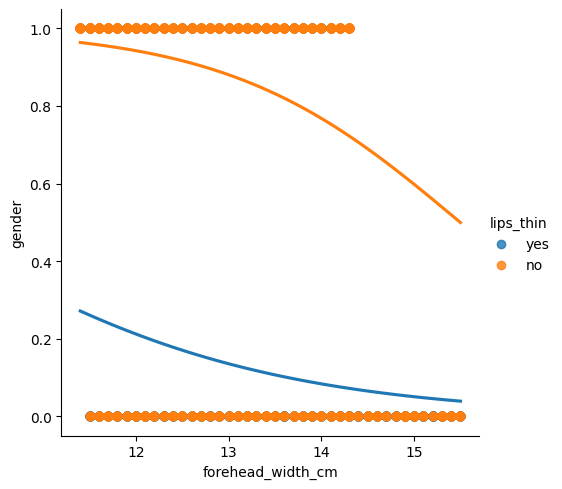

Optimization terminated successfully.
         Current function value: 0.353504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.361148
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,5.1891,0.748,6.941,0.000,3.724,6.654
forehead_width_cm,-0.5419,0.058,-9.410,0.000,-0.655,-0.429


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,12.3904,0.895,13.850,0.000,10.637,14.144
forehead_width_cm,-0.7995,0.067,-11.995,0.000,-0.930,-0.669


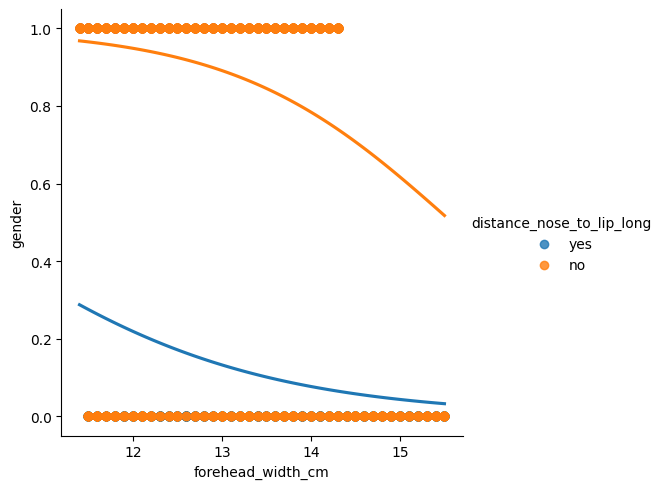

Optimization terminated successfully.
         Current function value: 0.346602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342871
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,6.0276,0.767,7.863,0.000,4.525,7.530
forehead_width_cm,-0.6084,0.059,-10.249,0.000,-0.725,-0.492


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,12.6769,0.934,13.576,0.000,10.847,14.507
forehead_width_cm,-0.8134,0.069,-11.718,0.000,-0.949,-0.677


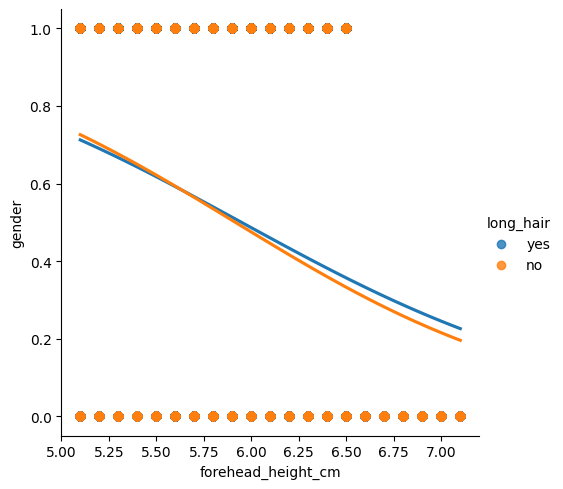

Optimization terminated successfully.
         Current function value: 0.654528
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646960
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,6.3627,0.363,17.545,0.000,5.652,7.074
forehead_height_cm,-1.0697,0.061,-17.571,0.000,-1.189,-0.950


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,7.0629,0.971,7.275,0.000,5.160,8.966
forehead_height_cm,-1.1939,0.163,-7.345,0.000,-1.512,-0.875


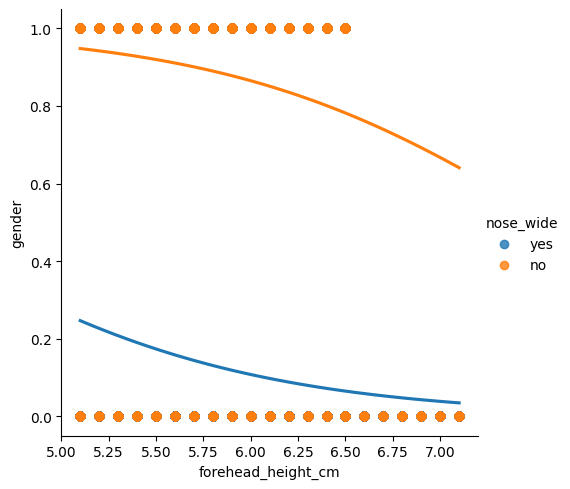

Optimization terminated successfully.
         Current function value: 0.340081
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.361637
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,4.5407,0.702,6.471,0.000,3.165,5.916
forehead_height_cm,-1.1095,0.121,-9.193,0.000,-1.346,-0.873


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,8.8334,0.809,10.925,0.000,7.249,10.418
forehead_height_cm,-1.1626,0.134,-8.674,0.000,-1.425,-0.900


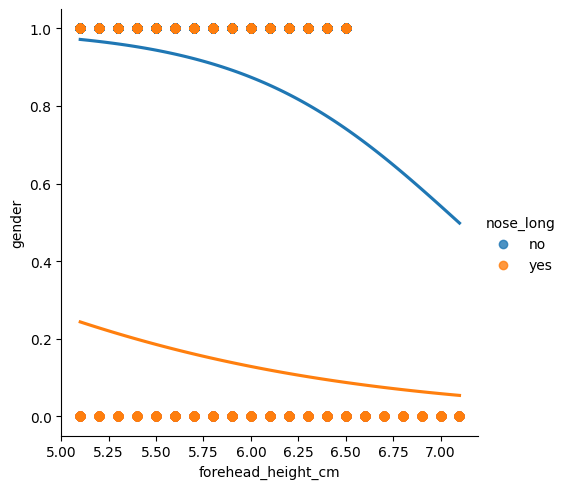

Optimization terminated successfully.
         Current function value: 0.379856
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.337164
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.2906,0.631,5.212,0.000,2.053,4.528
forehead_height_cm,-0.8679,0.108,-8.065,0.000,-1.079,-0.657


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,12.5502,0.898,13.968,0.000,10.789,14.311
forehead_height_cm,-1.7688,0.147,-12.047,0.000,-2.057,-1.481


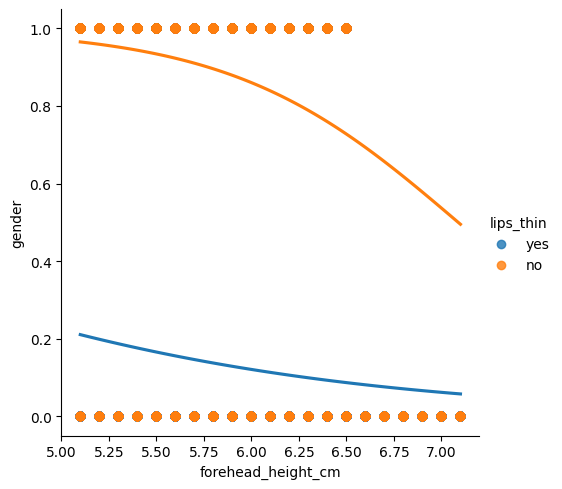

Optimization terminated successfully.
         Current function value: 0.363947
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.359439
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.4409,0.655,3.725,0.000,1.156,3.725
forehead_height_cm,-0.7380,0.111,-6.646,0.000,-0.956,-0.520


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,11.8380,0.831,14.237,0.000,10.208,13.468
forehead_height_cm,-1.6702,0.136,-12.256,0.000,-1.937,-1.403


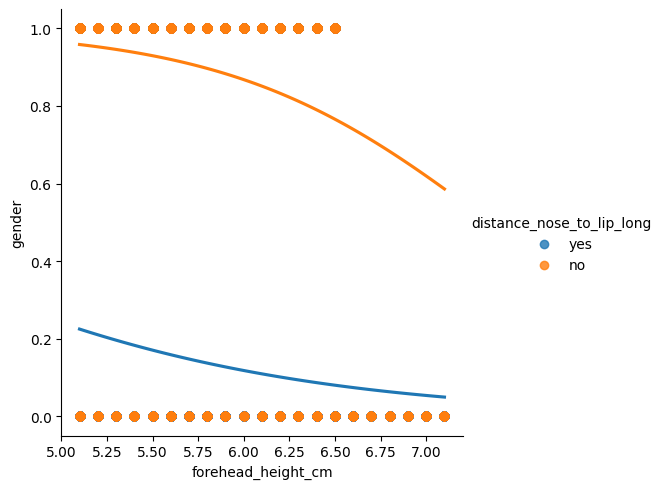

Optimization terminated successfully.
         Current function value: 0.358202
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.351178
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.1497,0.667,4.722,0.000,1.842,4.457
forehead_height_cm,-0.8605,0.113,-7.584,0.000,-1.083,-0.638


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,10.2554,0.832,12.331,0.000,8.625,11.885
forehead_height_cm,-1.3955,0.137,-10.179,0.000,-1.664,-1.127


In [15]:
# Plot logistic regression models for each categorical variable value
# and fit a simple logistic regression model for each observation of the cat_var
for n_col in num_col:
  for c_col in cat_var:
    sns.lmplot(x=n_col, y='gender', hue=c_col, data=gender_data, logistic=True, ci=False)
    plt.show()
    simple_log_mod1 = smf.logit("gender~" + c_col + "+" + n_col, data= gender_data[gender_data[c_col] == 'yes']).fit()
    simple_log_mod2 = smf.logit("gender~" + c_col + "+" + n_col, data= gender_data[gender_data[c_col] == 'no']).fit()
    display(simple_log_mod1.summary().tables[1])
    display(simple_log_mod2.summary().tables[1])


Due to the slope or stretch of the simple logistic ression models being different this suggests that there is an interaction between many pairs of explanatory variables on the response variable including: nose_wide and forehead_width_cm, nose_long and forehead_width_cm, lips_thin and forehead_width_cm, distance_nose_to_lip_long and forehead_width_cm, nose_wide and forehead_height_cm, nose_long and forehead_height_cm, lips_thin and forehead_height_cm, distance_nose_to_lip_long and forehead_height_cm. If we want to more effectively model the realtionship that exisits between these variables, we might consider incorperating a corresponding set of interaction terms. Next I will see if the log-likihood function changes depending on the use of each interaction term. The higher the log-likihood function the better.

In [16]:
# Fitting a full model without interaction terms
full_mod = smf.logit('gender~forehead_width_cm+forehead_height_cm+long_hair+nose_wide+nose_long+lips_thin+distance_nose_to_lip_long', data=gender_data).fit()
full_mod.llf

Optimization terminated successfully.
         Current function value: 0.073626
         Iterations 10


-368.2058164196759

In [17]:
# Fitting full model with interaction terms
formula = 'gender~forehead_width_cm+forehead_height_cm+long_hair+nose_wide+nose_long+lips_thin+distance_nose_to_lip_long+'
formula += '+nose_wide*forehead_width_cm + nose_wide+forehead_height_cm'
formula += '+nose_long*forehead_width_cm + nose_long+forehead_height_cm'
formula += '+lips_thin*forehead_width_cm + lips_thin+forehead_height_cm'
formula += '+distance_nose_to_lip_long*forehead_width_cm + distance_nose_to_lip_long+forehead_height_cm'

full_inter_mod = smf.logit(formula, data=gender_data).fit()
full_inter_mod.llf

Optimization terminated successfully.
         Current function value: 0.072615
         Iterations 10


-363.14975551284766

As seen above, the model with the interaction terms maximize the loglihood function. As a result of using the interaction terms in our model the realtionship between the explanatory variables and the response variable will be better reflected. Having them will allow for the sub-logistic regression models of the numerical variables to be different for the different values of the categorical variables.

It's important to mention that the dataset hasn't been split into its training and test datasets so adding the interaction terms may have different effects on each. If we added the interaction terms to the training dataset the model fit of will either increase or stay the same. For the test dataset, we don't know what will happen until we add them.

## <u>5. Model Data Preprocessing</u>

#### **0/1 Response Variable**

In [18]:
# Resetting gender_data since categorical variables were converted to yes/no for earlier analysis
gender_data = pd.read_csv("gender_classification_v7.csv")

# Creating the 0/1 response variable
gender_data['gender'] = gender_data['gender'].replace({'Female':1, 'Male':0})

#### **Features Matrix and Target Array**

In [19]:
# Creating training and test datasets
gender_train, gender_test = train_test_split(gender_data,test_size=0.2,random_state=207)

# Creating training features matrix
x_train = gender_train.drop(['gender'], axis=1)

# Creating training target array
y_train = gender_train['gender']

# Creating training features matrix
x_test = gender_test.drop(['gender'], axis=1)

# Creating training target array
y_test = gender_test['gender']

#### **Explanatory Variable Scaling**

In [20]:
# Creating a StandardScaler() object
scaler_training = StandardScaler()

# Scaling x_train and replacing
scaled_expl_vars = scaler_training.fit_transform(x_train)
x_train = pd.DataFrame(scaled_expl_vars, columns=x_train.columns)

# Scaling x_test and replacing
scaled_expl_vars = scaler_training.fit_transform(x_test)
x_test = pd.DataFrame(scaled_expl_vars, columns=x_test.columns)

#### **Categorical Explanatory Indicator Variable**

Our categorical explanatory variables were given to us in 0/1 indicator form, therefore no additional work is needed in this section.

## <u>6. Feature Selection with k-Fold Cross-Validation <u/>

#### **Option C: LASSO Regression**

In [21]:
# Creating an empty list
temp_list = []

# Looping through values of lamba, 0.01 to 2 of increments 0.1
for i in np.arange(0.01, 2, 0.1):

    # creating lasso model
    logistic_lasso_mod = LogisticRegression('l1', solver='liblinear', max_iter=1000, C=1/i)

    # instantiating kfold
    cross_val = KFold(n_splits=5, shuffle=True, random_state=207)

    # creating k=5 cross-validation 
    auc_scores = cross_val_score(logistic_lasso_mod, x_train, y_train, cv=cross_val, scoring='roc_auc')
    
    # adding lambda and auc to list
    temp_list.append({"lambda": i, 'average_auc':auc_scores.mean()})

# Turning list into df
lasso_models = pd.DataFrame(temp_list)

# Finding highest auc value
lasso_models[lasso_models['average_auc'] == lasso_models['average_auc'].max()]

,lambda,average_auc
0,0.01,0.996233


Displayed above are the corresponding lambda values to the highest AUC scores of the LASSO models.

We chose to use LASSO regularization for logistic regression. We trained multiple LASSO logistic regression models with a wide range of lambda values. Specifically, lambda values from 0.01 to 2 with increments of 0.1 were tested, resulting in a total of 200 models.

After evaluating each model and calculating the average test AUC, multiple lambda values were found, resulted in the same highest average test AUC of 0.99623. Some of these lambda values include 0.21, 0.31, 0.01, 0.11, 0.61, 0.41 and so on.

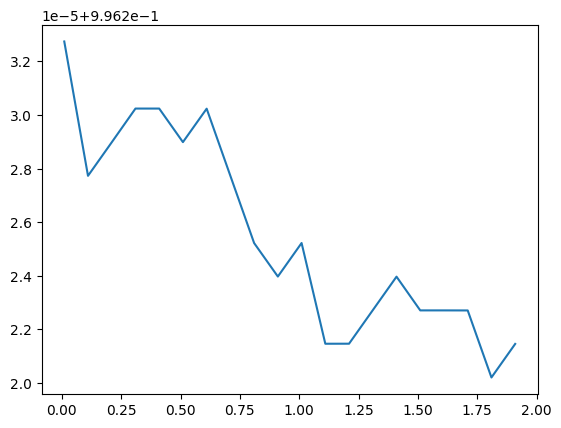

In [22]:
# Plotting lambda values against the test auc values
plt.plot(lasso_models['lambda'].values, lasso_models['average_auc'].values)

#### **Option C: Ridge Regression**

In [23]:
# Creating an empty list
temp_list = []

# Looping through values of lamba 1 to 10000 of increments 100
for i in np.arange(1, 10000, 100):

    # creating ridge model
    logistic_ridge_mod = LogisticRegression('l2', solver='liblinear', max_iter=1000, C=1/i)

    # instantiating kfold
    cross_val = KFold(n_splits=5, shuffle=True, random_state=207)

    # creating k=5 cross-validation 
    auc_scores = cross_val_score(logistic_ridge_mod, x_train, y_train, cv=cross_val, scoring='roc_auc')

    # adding lambda and auc to list
    temp_list.append({"lambda": i, 'average_auc':auc_scores.mean()})

# Turning list into df
ridge_models = pd.DataFrame(temp_list)

# Finding highest auc value
ridge_models[ridge_models['average_auc'] == ridge_models['average_auc'].max()]

,lambda,average_auc
73,7301,0.996396
74,7401,0.996396
75,7501,0.996396


Displayed above are the corresponding lambda values to the highest AUC scores of the Ridge models.

For Ridge Regression, we trained multiple logistic regression models with L2 regularization using a wide range of lambda values from 1 to 10,000 with increments of 100. The goal was to find the optimal lambda value that yields the highest average test AUC.

After evaluating each model and calculating the average test AUC, we found that the highest average test AUC of 0.996396 was achieved by three lambda values: 7301, 7401, and 7501. This indicates that the model's performance is stable within this range of lambda values.

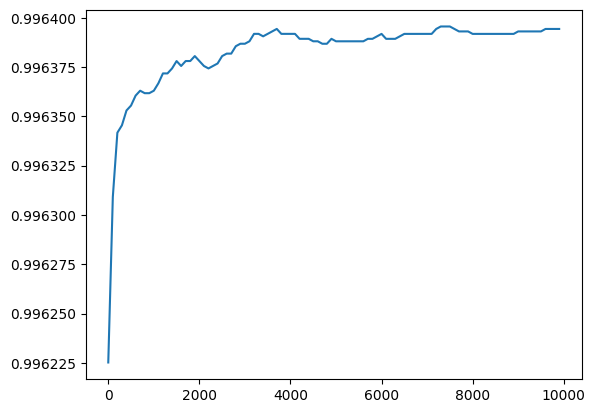

In [24]:
# Plotting lambda values against the test auc values
plt.plot(ridge_models['lambda'].values, ridge_models['average_auc'].values)

To visualize the relationship between lambda and the average test AUC, we plotted the results in a line graph. The graph showed a clear peak in the average test AUC around the optimal lambda values, confirming the effectiveness of Ridge regularization for this dataset.

#### **Option C: Elastic Net Regression**

In [25]:
# Creating an empty list
temp_list = []

# Looping through values of lamba 0.1 to 2.05 of increments 0.02
for i in np.arange(0.1, 2.05, 0.02):

    # creating elastic net model
    logistic_en_mod = LogisticRegression('elasticnet', solver='saga', max_iter=1000, l1_ratio=0.5, C=1/i)
    
    # instantiating kfold
    cross_val = KFold(n_splits=5, shuffle=True, random_state=207)

    # calculating auc scores 
    auc_scores = cross_val_score(logistic_en_mod, x_train, y_train, cv=cross_val, scoring='roc_auc')

    # adding lambda and auc to list
    temp_list.append({"lambda": i, 'average_auc':auc_scores.mean()})

# Turning list into df
en_models = pd.DataFrame(temp_list)

# Finding highest auc value
en_models[en_models['average_auc'] == en_models['average_auc'].max()]

,lambda,average_auc
15,0.40,0.996231
18,0.46,0.996231
19,0.48,0.996231
20,0.50,0.996231
21,0.52,0.996231
22,0.54,0.996231
23,0.56,0.996231


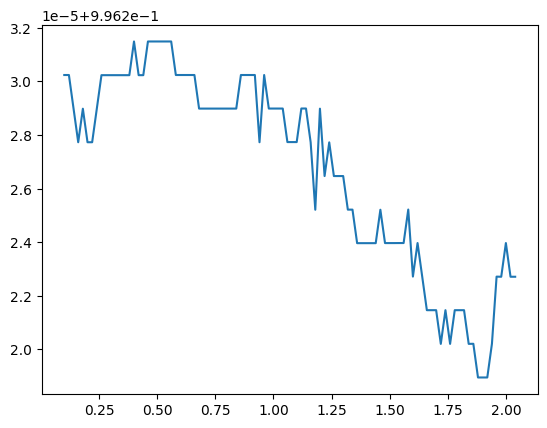

In [26]:
# Plotting lambda values against the test auc values
plt.plot(en_models['lambda'].values, en_models['average_auc'].values)

Displayed above are the corresponding lambda values to the highest AUC scores of the Elastic Net models.

Next, we explored Elastic Net Regression, which combines both L1 and L2 regularization. We trained multiple logistic regression models with Elastic Net regularization using lambda values ranging from 0.1 to 2.05 with increments of 0.02. The L1 ratio was set to 0.5, giving equal weight to L1 and L2 regularization.

After evaluating the models, we found that the highest average test AUC of 0.996231 was achieved by six lambda values: 0.40, 0.46, 0.48, 0.50, 0.52, and 0.54. This suggests that the model's performance is robust within this range of lambda values.

Again, we plotted the results in a line graph to visualize the relationship between lambda and the average test AUC. The graph showed the average test AUC around the optimal lambda values, indicating the effectiveness of Elastic Net regularization for this dataset.

**Best Model AUC Summaries**

* Lasso Regression: 0.996231
* Ridge Regression: 0.996396
* Elastic Net Regression: 0.996231

Considering all models and their AUC values, the ridge regression performed the best with an AUC value of 0.996396.

## <u>7. Best Model Discussion</u>

#### **Train-Test-Split**

In [27]:
# Train-Test-Split
gender_train, gender_test = train_test_split(gender_data, test_size=0.2, random_state=207)

#### **Fit the Chosen Model**

Based on our analysis, the ridge logistic regression model had the best fit based on AUC. For further analysis we chose to work with the ridge model which had a lambda value of 7501 that yielded the higest average auc value.

In [ ]:
# Creating and fitting the best Ridge model
best_model = LogisticRegression('l2', solver='liblinear', max_iter=1000, C=1/7501)
best_model = best_model.fit(x_train, y_train)

In [29]:
# Making intercept and slopes viewable
print("Intercept:", best_model.intercept_)
print("Coefficients:", best_model.coef_)

Intercept: [-0.00073589]
Coefficients: [[ 0.0041852  -0.06137687 -0.04974995 -0.14924822 -0.14499015 -0.14275644
  -0.14630999]]


#### **Equation**

$
\hat{gender} = \frac{1}{1 + \exp\left(-\begin{aligned}
&-0.00073589 \\
&+ 0.0041852(\,\text{long hair}) \\
&- 0.06137687(\,\text{forehead width cm}) \\
&- 0.04974995(\,\text{forehead height cm}) \\
&- 0.14924822(\,\text{nose wide}) \\
&- 0.14499015(\,\text{nose long}) \\
&- 0.14275644(\,\text{lips thin}) \\
&- 0.14630999(\,\text{distance nose to lip long})
\end{aligned}\right)}
$

#### **Multicollinearity**

* **Checking Numerical Explanatory Variables**

In [30]:
# Isolating numerical explanatory variables
numerical = gender_data[['forehead_width_cm','forehead_height_cm']]

# Calculating correlation coefficients
numerical.corr()

,forehead_width_cm,forehead_height_cm
forehead_width_cm,1.000000,0.088596
forehead_height_cm,0.088596,1.000000


Since the correlation coefficient between our two numerical variables is less than the threshold of 0.7, our numerical explanatory variables are not experiencing multicollinearity.

* **Checking Categorical Explanatory Variables**

In [31]:
# Changing the values of categorical variables that are in 0/1 format into yes/no format
df = gender_data
df['distance_nose_to_lip_long'] = df['distance_nose_to_lip_long'].replace({1:'yes', 0:'no'})
df['lips_thin'] = df['lips_thin'].replace({1:'yes', 0:'no'})
df['nose_long']= df['nose_long'].replace({1:'yes', 0:'no'})
df['long_hair']= df['long_hair'].replace({1:'yes', 0:'no'})
df['nose_wide']= df['nose_wide'].replace({1:'yes', 0:'no'})
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,yes,11.8,6.1,yes,no,yes,yes,0
1,no,14.0,5.4,no,no,yes,no,1
2,no,11.8,6.3,yes,yes,yes,yes,0
3,no,14.4,6.1,no,yes,yes,yes,0
4,yes,13.5,5.9,no,no,no,no,1


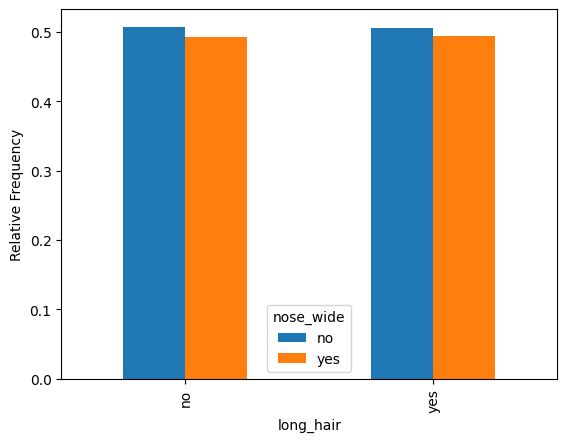

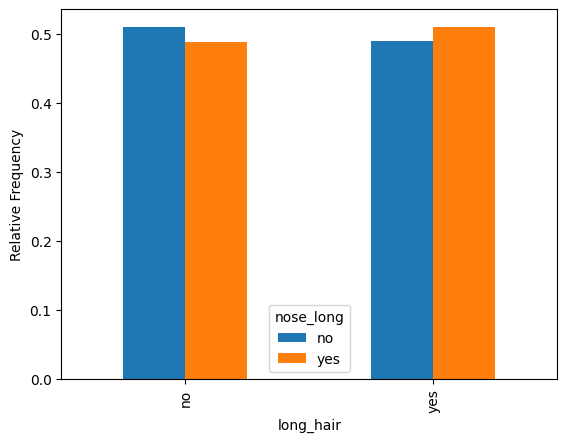

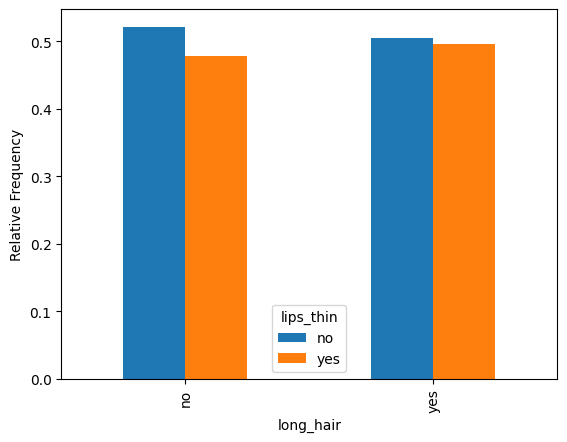

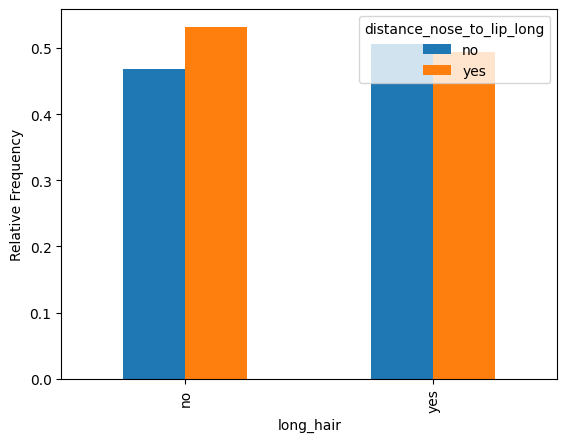

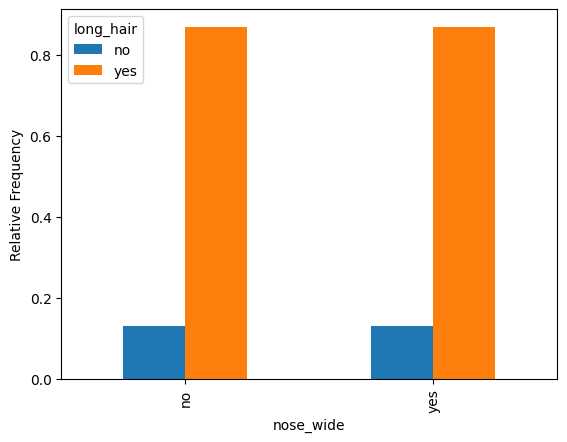

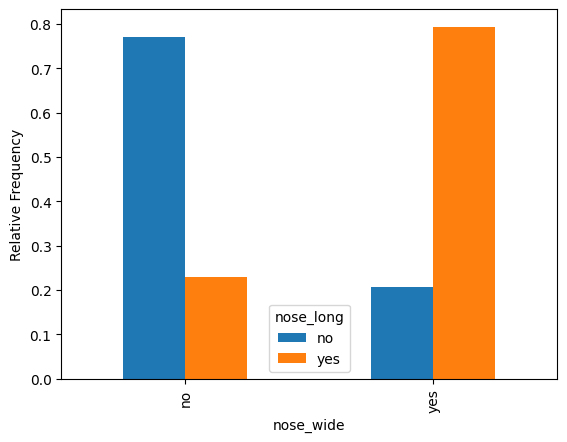

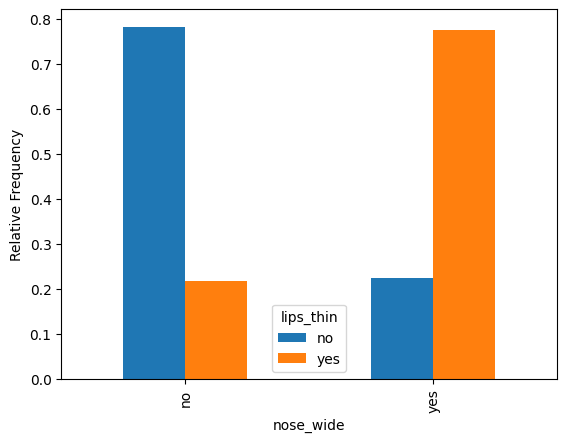

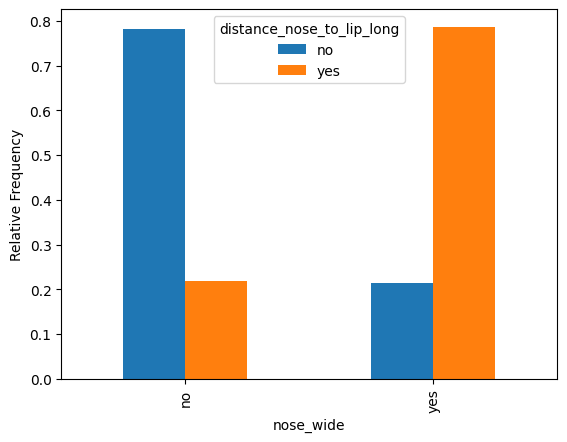

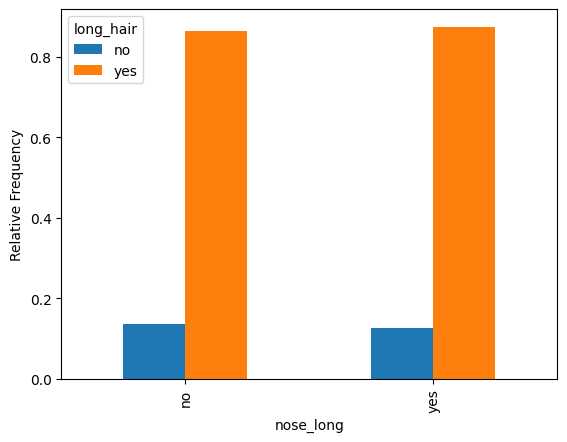

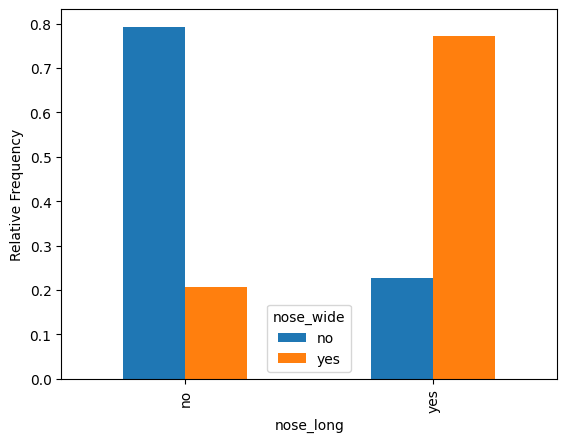

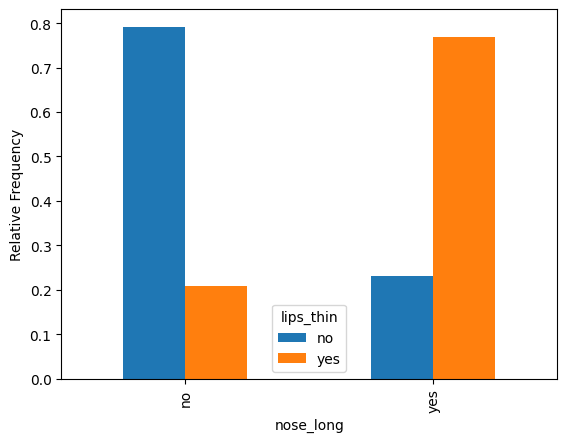

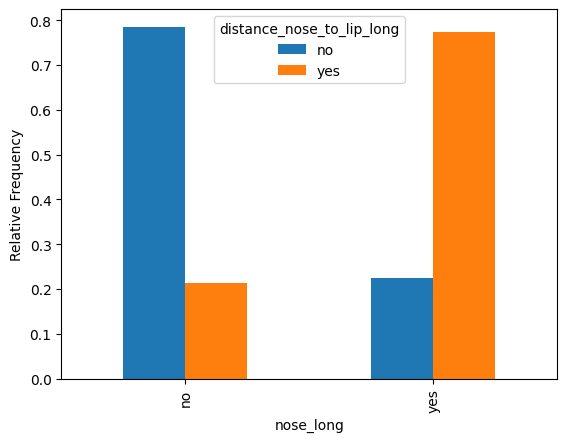

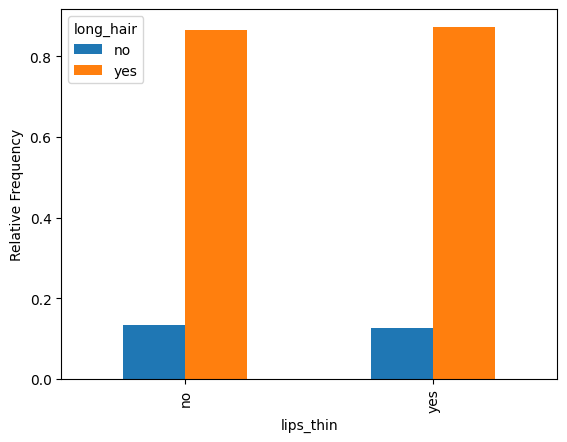

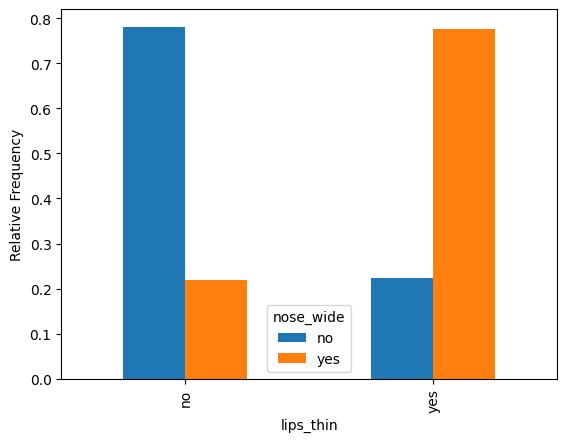

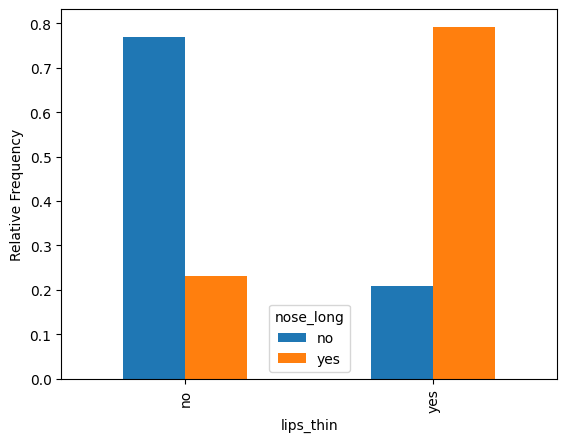

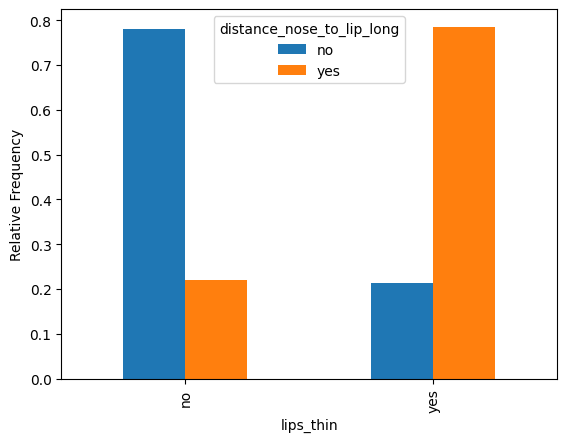

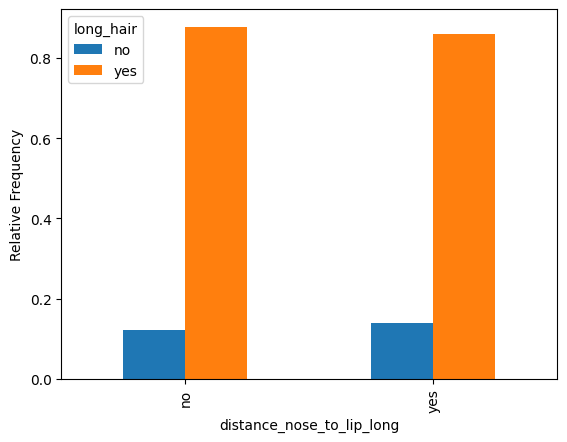

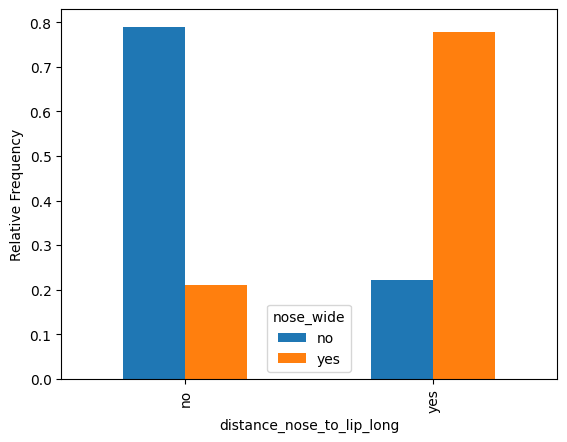

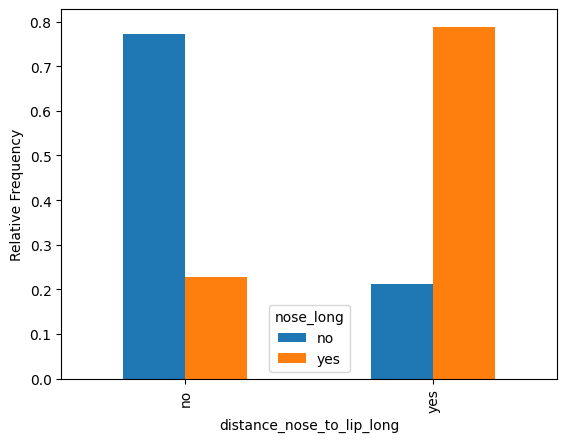

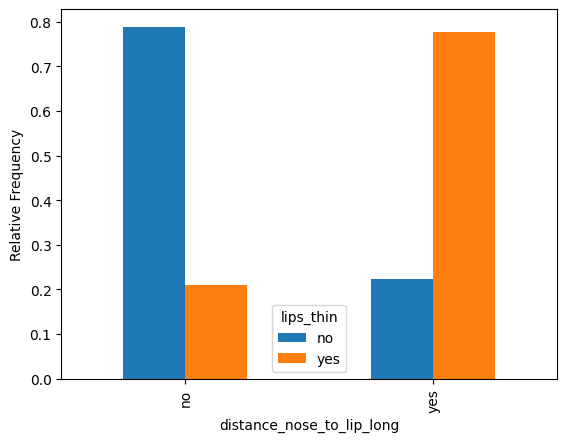

In [32]:
# Visualizing the realtionship between the categorical explanatory variables using crosstab
categorical_variables = [ 'long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
for col1 in categorical_variables:
  for col2 in categorical_variables:
    if ((df[col1].equals(df[col2]))==False): # leaving out crosstab between variable and itself
        temp = pd.crosstab(df[col1], df[col2], normalize='index')
        temp.plot.bar()
        plt.ylabel('Relative Frequency')
        plt.show() 

Since the bars of the crosstab plots are different for each of the plots, this means that all of the variables are experiencing collinearity with one another with certain varaibles experiencing stronger multicollinearity than others.

* **Checking Numerical against Categorical Explanatory Variables**

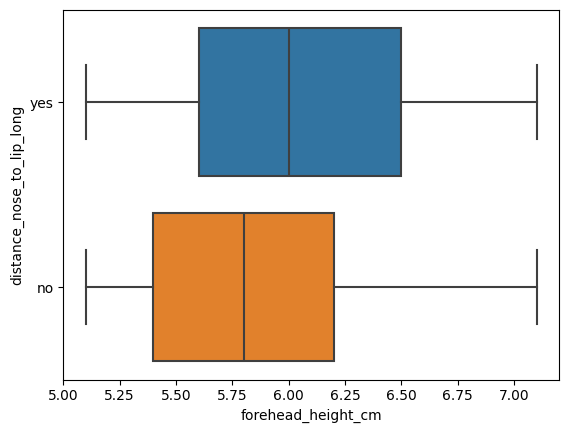

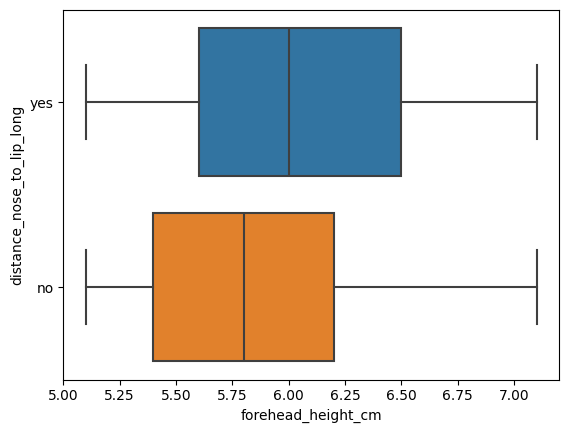

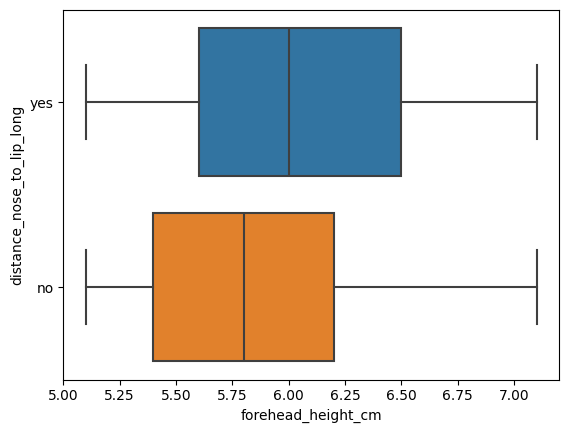

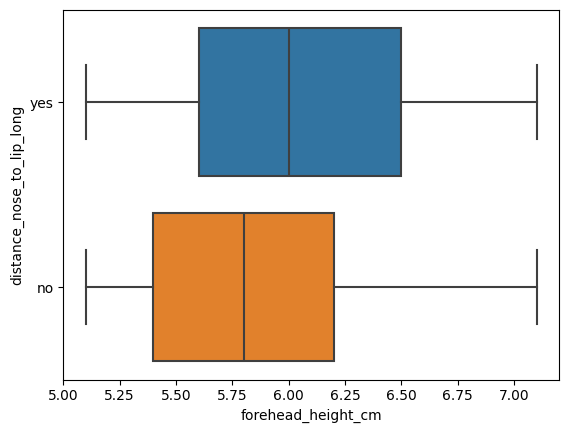

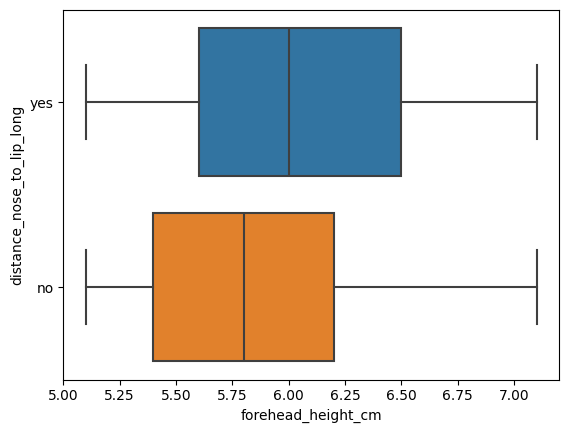

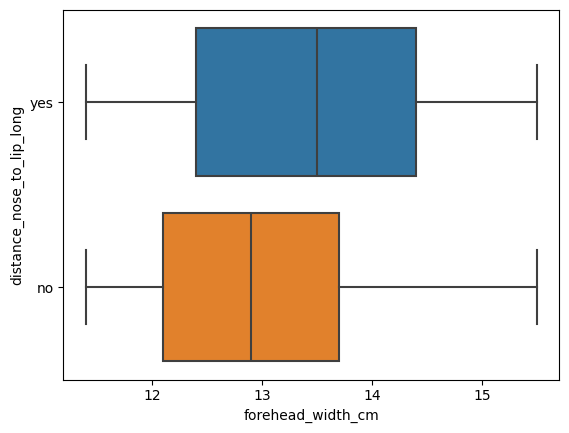

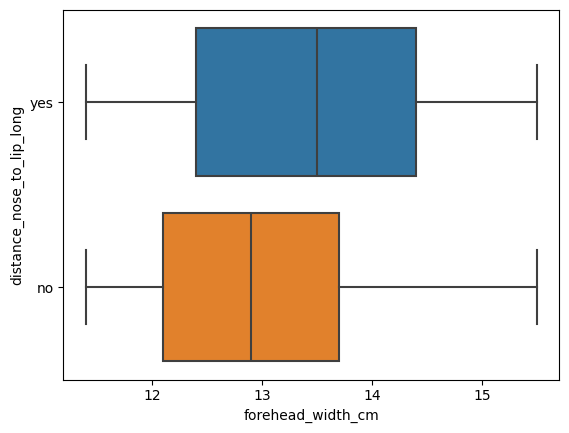

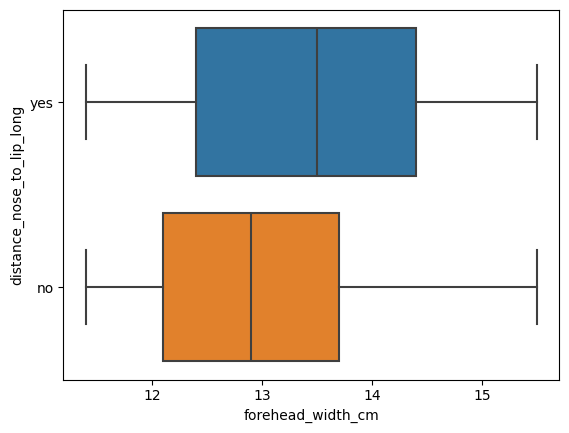

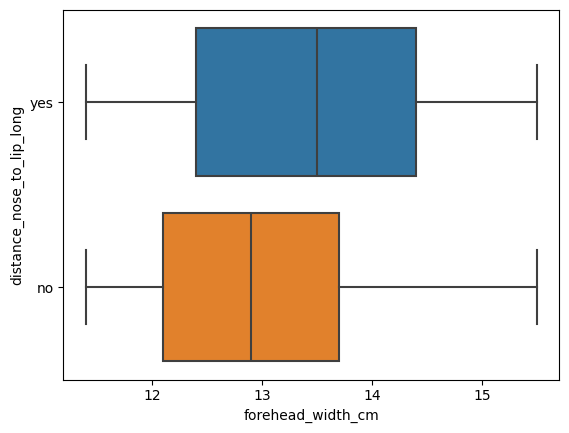

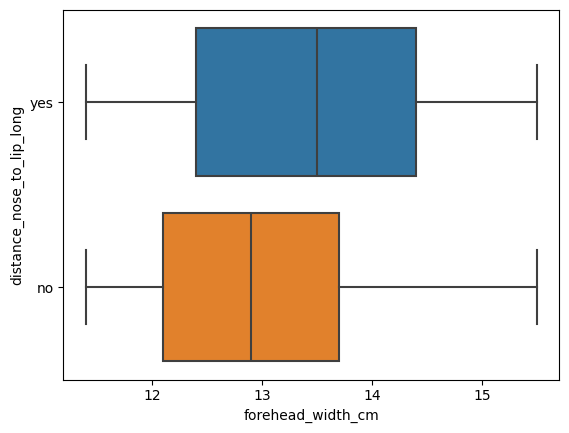

In [33]:
# Visualizing the realtionship between the numerical explanatory variables and categorical variables

categorical_variables = [ 'long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
numerical_variables = ['forehead_height_cm', 'forehead_width_cm']

for col1 in numerical_variables:
  for col2 in categorical_variables:
    sns.boxplot(x=df[col1], y=df[col], data=df)
    plt.show()

Since the box plots between the numerical and cateogorical variables shows high overlap this means that there is not that big of an issue of multicollnearity between the variables.

#### **Slope Interpretations**

We are not able to interpret the magnitudes of the slopes as indicating how important the corresponding explanatory variable is when it comes to predicting gender in a logistic regression model because earlier we found that interaction exists between many pairs of the categorical explanatory variables. We can not interpret the magnitudes of our slopes because the variable interactions may lead to misleading slopes in our models.

#### **Overfitting Explanatory Variables**


Considering our best model used all of our 8 explanatory variables as none of the slopes were zeroed out by the lasso model, this means that none of the variables were overfitting the model.

#### **Test ROC and AUC**

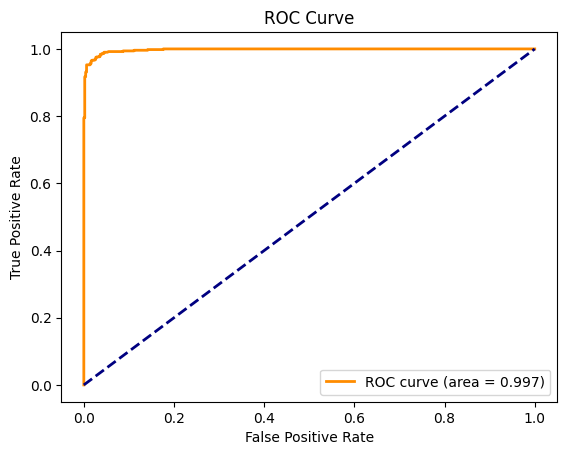

In [34]:
# Calculating predictive probabilities
gender_test['predictive_prob'] = best_model.predict_proba(x_test)[:,1]

# Calculating fpr, tpr, and threshold values for many predictive probability thresholds
fprs, tprs, thresholds = roc_curve(y_true=gender_test['gender'],y_score=gender_test['predictive_prob'])

# Calculating roc_auc_score
auc = roc_auc_score(y_true=gender_test['gender'],y_score=gender_test['predictive_prob'])
auc

# Function to plot roc_curve
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

#Plotting roc curve
plot_roc(fprs,tprs,auc)

The AUC for the ROC curve for our test dataset comes out to be 0.997. This AUC value implies great fit meaning our model is doing very good classifying observation in the test dataset in general.

#### **Best Predictive Probability Threshold**

In [35]:
# Creating empty list
temp_list = []

# Function that creates thresholds
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],'fpr':[fpr],'tpr':[tpr]})

# Looping through different threshold values using function to calculate dpr and tpr and adding to list
for thresh in np.arange(0,1.01,0.01):
    print(fpr_tpr_thresh(gender_test['gender'], gender_test['predictive_prob'], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0       0.01  1.0  1.0
   threshold  fpr  tpr
0       0.02  1.0  1.0
   threshold  fpr  tpr
0       0.03  1.0  1.0
   threshold  fpr  tpr
0       0.04  1.0  1.0
   threshold  fpr  tpr
0       0.05  1.0  1.0
   threshold  fpr  tpr
0       0.06  1.0  1.0
   threshold  fpr  tpr
0       0.07  1.0  1.0
   threshold  fpr  tpr
0       0.08  1.0  1.0
   threshold  fpr  tpr
0       0.09  1.0  1.0
   threshold  fpr  tpr
0        0.1  1.0  1.0
   threshold  fpr  tpr
0       0.11  1.0  1.0
   threshold  fpr  tpr
0       0.12  1.0  1.0
   threshold  fpr  tpr
0       0.13  1.0  1.0
   threshold  fpr  tpr
0       0.14  1.0  1.0
   threshold  fpr  tpr
0       0.15  1.0  1.0
   threshold  fpr  tpr
0       0.16  1.0  1.0
   threshold  fpr  tpr
0       0.17  1.0  1.0
   threshold  fpr  tpr
0       0.18  1.0  1.0
   threshold  fpr  tpr
0       0.19  1.0  1.0
   threshold  fpr  tpr
0        0.2  1.0  1.0
   threshold  fpr  tpr
0       0.2

Given our particular research goals and the person in our research motivation, we chose to try to maximize 
high accuracy for both positives and negatives so that the facial recognion model would have the highest chance at successs. Considering this, we wanted to find a threshold that gave us both a low false positive rate and a high true postive rate.

After looking at the values we decided that an FPR of approximately 5% (0.050607) and a TPR of approximately 99% (0.990138) would work best in our case. The predictive probability threshold that corresponds to an FPR of 5% and a TPR of 99% is 0.48.

Putting the FPR into words, using our model we found that 5% of males were incorrectly classified as females.

Putting the TPR into words, using our model we found that 99% of females were correctly classified as females.

## <u>8. Additional Analysis/Insight</u>

For the additional analysis I'll be creating a decision tree. I have no previous knowledge of creating a decision tree so I'll be using the majority of the code and explanations of what it is from a data camp website. This is the link to the website: https://www.datacamp.com/tutorial/decision-tree-classification-python


I decided to make a decision tree because I believe that it is a useful and simple way to visualize the predictions being made to determine if a person is a male or female.


I'll be using the gini index to measure how often a randomly chosen element would be incorrectly identified. The lower the gini index the better.

In [36]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree
from sklearn.model_selection import train_test_split # Import train_test_split function

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.971028971028971


As you can see the accuracy for this model is very high. The accuracy can vary depending on a variety of other factors, but in terms of the max_depth value the higher the value the more the model is being overfit and the lower the value the more the model is being underfit. After testing a few other max_depths, 7 is what gave the highest accuracy.

In [37]:
import pydot
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

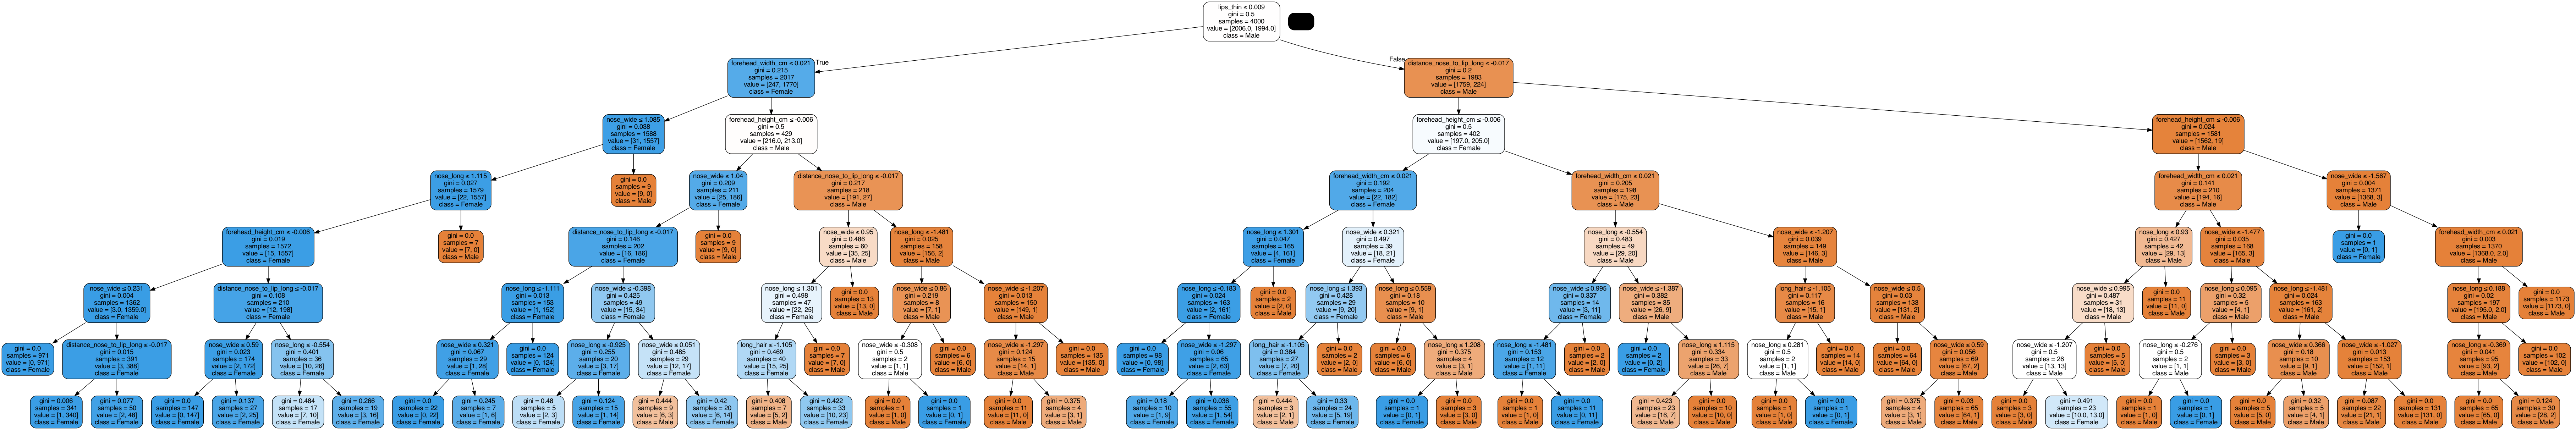

In [38]:
feature_cols = ['long_hair','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long','forehead_width_cm', 'forehead_height_cm']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Male','Female'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('gender_tree.png')
Image(graph.create_png())

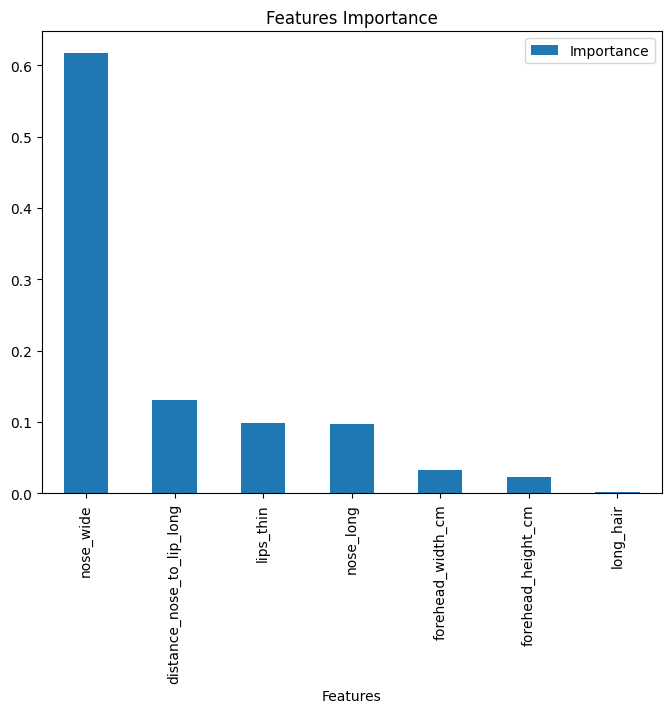

In [39]:
feat_importances = pd.DataFrame(clf.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

plt.xlabel("Features")
plt.title("Features Importance")
plt.show()

The decision tree and the bar plot helps to achieve both of our primary and secondary goals of building a predictive model that yields reliable insights and describes the nature of the relationship of the variables we use in our model. By looking at the decision tree we are able to see how the dataset is being split up and used to determine which features are important in correctly predicting if a person is male or female. In the end, from the bar plot we can see that the variable nose_wide was the most important and therefore telling that the relationship between that feature and the response variable is strong.

## <u>9. Conclusion</u>

We would recommend our best model to an individual who is working to create an accurate facial recognition model. This is because our best model has an AUC value of 0.997 for the ROC curve of our test dataset. This AUC value implies a great fit because the closer an AUC value is to 1, the better the fit of the model is. This means that our best model does a very good job of classifying observations in the test dataset overall. We do not know for sure that our chosen model yields the highest possible average test AUC because we did not try making all possible models that we could make for this dataset. For a more complete analysis, we could have tried doing forwards and backwards elimination as well as some other kinds of models we have not learned about in class. By using all these models, there would be more of a guarantee that our model is the best possible one and that we yielded the highest possible AUC. Some shortcomings that our model has are the fact that it displays multicollinearity and there is a lot of slope interaction within the model. In our future work, we should work to get rid of these factors as they may deter the reliability of the model. We should also test different kinds of datasets that use more explanatory variables, for example, a dataset that has more characteristic features like face width, eye shape, nostril size, etc. By using data with more explanatory variables, there would be more of a guarantee that someone who uses this data will make more reliable and accurate predictions to predict gender.

## <u>References</u>

Glover, E. (2024, February 23). Facial Recognition Technology, explained. Built In. https://builtin.com/articles/facial-recognition-technology-explained#:~:text=Facial%20recognition%20is%20a%20technology,of%20known%20faces%20or%20templates.

Najibi, A. (2020, October 26). Racial discrimination in face recognition technology. Science in the News. https://sitn.hms.harvard.edu/flash/2020/racial-discrimination-in-face-recognition-technology/